<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/Proyecto_final/Proyecto_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REDES NEURONALES--MACHINE LEARNING
CARLOS LEONEL GUERRERO RODRIGUEZ 314570


### La evaluación de un modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras para el procesamiento de imágenes.

### Una CNN es un tipo de red neuronal diseñada específicamente para el procesamiento de datos de tipo grid, como imágenes. Está compuesta por capas convolucionales que aprenden automáticamente patrones y características de las imágenes. Esto hace que las CNN sean especialmente eficaces para tareas de visión por computadora.



# Objetivo Principal:
### El objetivo principal de tu proyecto es desarrollar un sistema capaz de analizar imágenes faciales y determinar la emoción expresada por la persona en la fotografía.

### Empleando tecnologías de aprendizaje profundo, en particular redes neuronales convolucionales (CNN), implementadas con la biblioteca Keras. Estas redes son eficaces para extraer patrones complejos de imágenes, siendo especialmente útiles en tareas de visión por computadora como el reconocimiento facial.

In [ ]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [ ]:
TRAIN_DIR = "C:\\Users\\UsuarioFinal\\Desktop\\train"
TEST_DIR = "C:\\Users\\UsuarioFinal\\Desktop\\test"
TAMANO_LOTE = 32

In [ ]:
for carpeta in os.listdir(TRAIN_DIR):
    archivos = gb.glob(pathname=str(TRAIN_DIR + '/' + carpeta + '/*.jpg'))
    print(f'Para datos de entrenamiento, se encontraron {len(archivos)} en la carpeta {carpeta}')


Para datos de entrenamiento, se encontraron 3995 en la carpeta angry
Para datos de entrenamiento, se encontraron 436 en la carpeta disgust
Para datos de entrenamiento, se encontraron 4097 en la carpeta fear
Para datos de entrenamiento, se encontraron 7215 en la carpeta happy
Para datos de entrenamiento, se encontraron 4965 en la carpeta neutral
Para datos de entrenamiento, se encontraron 4830 en la carpeta sad
Para datos de entrenamiento, se encontraron 3171 en la carpeta surprise


In [ ]:
for carpeta in os.listdir(TEST_DIR):
    archivos = gb.glob(pathname=str(TEST_DIR + '/' + carpeta + '/*.jpg'))
    print(f'Para datos de prueba, se encontraron {len(archivos)} en la carpeta {carpeta}')


Para datos de prueba, se encontraron 958 en la carpeta angry
Para datos de prueba, se encontraron 111 en la carpeta disgust
Para datos de prueba, se encontraron 1024 en la carpeta fear
Para datos de prueba, se encontraron 1774 en la carpeta happy
Para datos de prueba, se encontraron 1233 en la carpeta neutral
Para datos de prueba, se encontraron 1247 en la carpeta sad
Para datos de prueba, se encontraron 831 en la carpeta surprise


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os  # Agrega esta línea para importar el módulo os

def ver_imagen_aleatoria(directorio_objetivo, clase_objetivo):
    # Vamos a ver imágenes desde aquí
    carpeta_objetivo = os.path.join(directorio_objetivo, clase_objetivo)  # Utiliza os.path.join para la construcción de la ruta

    # Obtiene una ruta de imagen aleatoria
    imagen_aleatoria = random.sample(os.listdir(carpeta_objetivo), 1)

    # Lee la imagen y plótala usando matplotlib
    img = mpimg.imread(os.path.join(carpeta_objetivo, imagen_aleatoria[0]))  # Utiliza os.path.join para la construcción de la ruta
    plt.imshow(img)
    plt.title(clase_objetivo)
    plt.axis('off')
    print(f"Forma de la imagen {img.shape}")

    return img


In [ ]:
nombres_clases =['angry', 'disgust', 'neutral', 'happy', 'sad', 'surprise','fear']


Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)
Forma de la imagen (48, 48)


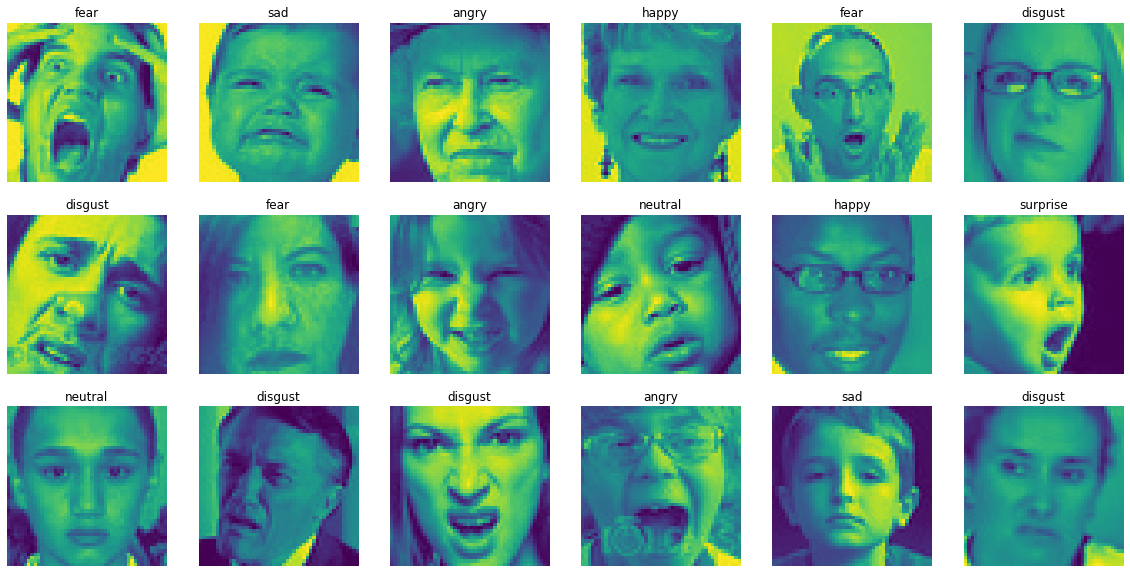

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    nombre_clase = random.choice(nombres_clases)
    img = ver_imagen_aleatoria(directorio_objetivo="C:\\Users\\UsuarioFinal\\Desktop\\train", clase_objetivo=nombre_clase)

plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Configuración del generador de datos para el conjunto de entrenamiento
generador_entrenamiento = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

# Configuración del generador de datos para el conjunto de prueba
generador_prueba = ImageDataGenerator(rescale=1./255)

# Generador de datos para el conjunto de entrenamiento
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory(TRAIN_DIR,
                                                                     target_size=(28, 28),
                                                                     batch_size=TAMANO_LOTE,
                                                                     class_mode='categorical')

# Generador de datos para el conjunto de prueba
conjunto_prueba = generador_prueba.flow_from_directory(TEST_DIR,
                                                       target_size=(28, 28),
                                                       batch_size=TAMANO_LOTE,
                                                       class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Inicializando la CNN
clasificador = Sequential()

# Paso 1 - Convolución
clasificador.add(Conv2D(16, (3, 3), input_shape=(28, 28, 3), activation='relu'))

# Paso 2 - Pooling
clasificador.add(MaxPooling2D(pool_size=(2, 2)))

# Agregando una segunda capa de convolución
clasificador.add(Conv2D(32, (3, 3), activation='relu'))
clasificador.add(MaxPooling2D(pool_size=(2, 2)))

# Paso 3 - Aplanamiento
clasificador.add(Flatten())

# Paso 4 - Conexión total
clasificador.add(Dense(units=28, activation='relu'))
clasificador.add(Dense(units=7, activation='softmax'))

# Compilando la CNN
clasificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Resumen del modelo
clasificador.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 28)                2

In [ ]:
historia = clasificador.fit(conjunto_entrenamiento,
                            epochs=10,
                            validation_data=conjunto_prueba)
clasificador.save('modelo1.h5')  # crea un archivo HDF5 'modelo1.h5'


Epoch 1/10
898/898 [==============================] - 84s 92ms/step - loss: 1.7419 - accuracy: 0.2988 - val_loss: 1.6330 - val_accuracy: 0.3679
Epoch 2/10
898/898 [==============================] - 58s 64ms/step - loss: 1.6282 - accuracy: 0.3641 - val_loss: 1.5562 - val_accuracy: 0.4000
Epoch 3/10
898/898 [==============================] - 58s 65ms/step - loss: 1.5776 - accuracy: 0.3860 - val_loss: 1.5138 - val_accuracy: 0.4166
Epoch 4/10
898/898 [==============================] - 59s 66ms/step - loss: 1.5354 - accuracy: 0.4080 - val_loss: 1.4944 - val_accuracy: 0.4217
Epoch 5/10
898/898 [==============================] - 58s 65ms/step - loss: 1.5031 - accuracy: 0.4226 - val_loss: 1.4624 - val_accuracy: 0.4374
Epoch 6/10
898/898 [==============================] - 58s 65ms/step - loss: 1.4844 - accuracy: 0.4301 - val_loss: 1.4447 - val_accuracy: 0.4397
Epoch 7/10
898/898 [==============================] - 59s 65ms/step - loss: 1.4696 - accuracy: 0.4404 - val_loss: 1.4442 - val_accuracy:

C:\Users\UsuarioFinal\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
clasificador.evaluate(conjunto_prueba)


225/225 [==============================] - 7s 31ms/step - loss: 1.3902 - accuracy: 0.4643


[1.3901689052581787, 0.46433547139167786]

Text(0, 0.5, 'Pérdida')

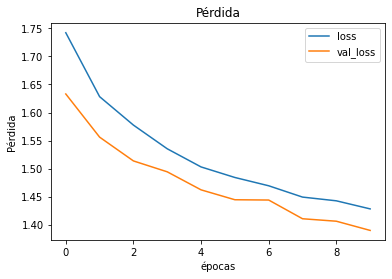

In [ ]:
pd.DataFrame(historia.history)[['loss','val_loss']].plot()
plt.title('Pérdida')
plt.xlabel('épocas')
plt.ylabel('Pérdida')


Text(0, 0.5, 'Precisión')

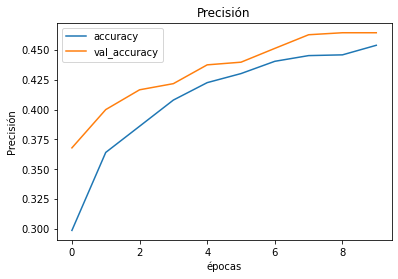

In [ ]:
pd.DataFrame(historia.history)[['accuracy','val_accuracy']].plot()
plt.title('Precisión')
plt.xlabel('épocas')
plt.ylabel('Precisión')


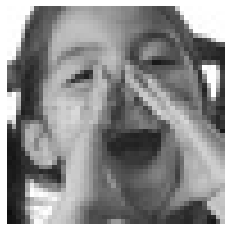

In [ ]:
ruta_modelo = "modelo1.h5"
modelo_cargado = keras.models.load_model(ruta_modelo)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

imagen = cv2.imread("C:\\Users\\UsuarioFinal\\Desktop\\train\\angry\\Training_63181.jpg")

imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostrar la imagen en el cuaderno
plt.imshow(imagen_rgb)
plt.axis('off')  # Desactivar los ejes
plt.show()


In [ ]:
imagen_desde_array = Image.fromarray(imagen, 'RGB')
imagen_redimensionada = imagen_desde_array.resize((28, 28))
entrada_expandida = np.expand_dims(imagen_redimensionada, axis=0)
datos_entrada = np.array(entrada_expandida)
datos_entrada = datos_entrada / 255

prediccion = modelo_cargado.predict(datos_entrada)
resultado = prediccion.argmax()
resultado


1/1 [==============================] - 0s 168ms/step


2

In [ ]:
conjunto_entrenamiento.class_indices


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}